## problem statement : we try to predict skin lesion diseases as a classification problem in order to classify the class of a given image from 3 classes normal, monkeypox, and chickenpox.
-----------------------------------------------------------------------------------------------
## Proposed solution (1): need a lot of data which I don’t have for our problem, That we hyper tune a vgg16 pre-trained model in order to classify the given images into three classes.
-----------------------------------------------------------------------------------------------
## Proposed solution (2):  we simply combine traditional ML algorithms a long with a pre-trained model like vgg-16 which is a CNN model of deep neural network type CNN is a uses neural network as algorithm of type deep neural networks. 
------------------------------------------------------------------------------------------------
## Explain: A pipeline of our method (combination) to tackle this problem :
### (AI ---> ML traditional ---> random forest classifier)
### (AI ---> ML / NN algorithms ---->type deep neural network ----> CNN architecture ----->pre-trained model like VGG16)

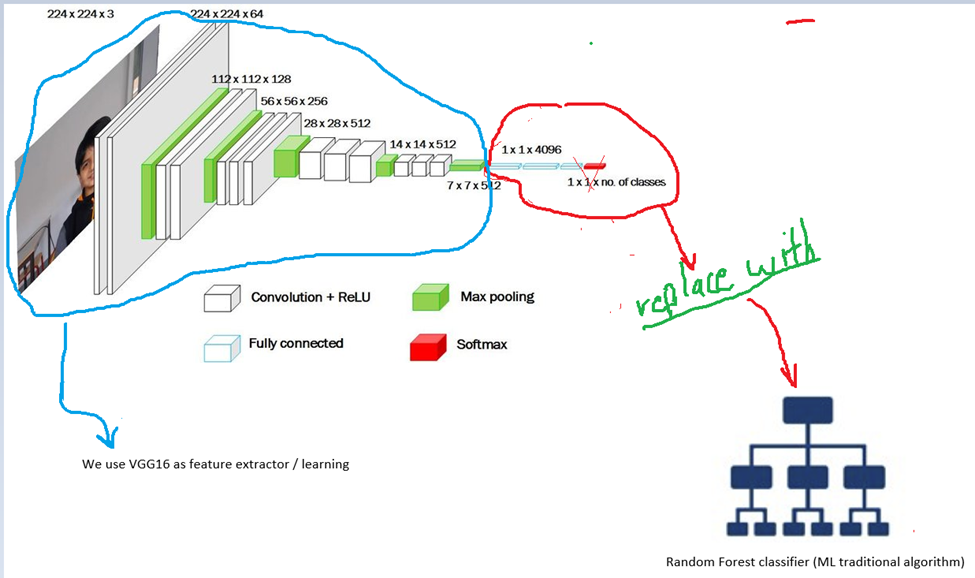 
#### A pipeline of our method (combination) to tackle this problem.

# Utilities

In [1]:
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
import os
import glob 
from glob import iglob
from collections import Counter
import cv2 as cv
import splitfolders
from keras.models import Model , Sequential
from keras.layers import Dense , Flatten , Conv2D , MaxPooling2D
from keras.layers.normalization import batch_normalization
from keras.applications.vgg16 import VGG16
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report , confusion_matrix , ConfusionMatrixDisplay ,recall_score, accuracy_score
from keras.preprocessing.image import ImageDataGenerator
from keras.utils import to_categorical
SIZE = 224
CHANNELS = 3

# First we will organize our data into two set(train,val/test) contain the following clasess ['normal','monkepyox','chickenpox'] as folders.

In [2]:
base_dataset_folder = 'C:/Dataset/splitted_images2' # base ---> tree dir contain all folder
input_folder = 'C:/Dataset/Data_split'
output_folder = 'C:/Dataset/splitted_images2'

In [3]:
splitfolders.ratio(input_folder, output_folder,
    seed=1337, ratio=(.8, .2, .0), group_prefix=None, move=False) # default values

Copying files: 321 files [00:00, 1585.51 files/s]


# this function to display or plot dataset classes after data split.

In [4]:
def percentage_value(pct, allvals):
    absolute = int(pct/100.*np.sum(allvals))
    return "{:.1f}%\n({:d})".format(pct, absolute)

def plot_dataset_description(path, title):
    classes = []
    for filename in iglob(os.path.join(path, "**","*.png")):
        classes.append(os.path.split(os.path.split(filename)[0])[-1])

    classes_cnt = Counter(classes)
    values = list(classes_cnt.values())
    labels = list(classes_cnt.keys())

    plt.figure(figsize=(8,8))
    plt.pie(values, labels=labels, autopct=lambda pct: percentage_value(pct, values), 
            shadow=True, startangle=140 , normalize=True)

    plt.title(title)    
    plt.show()

In [5]:
train_data = 'C:/Dataset/splitted_images2/train'
valid_data =  'C:/Dataset/splitted_images2/val'

# using above function to represent our training and validation data in pie chart.

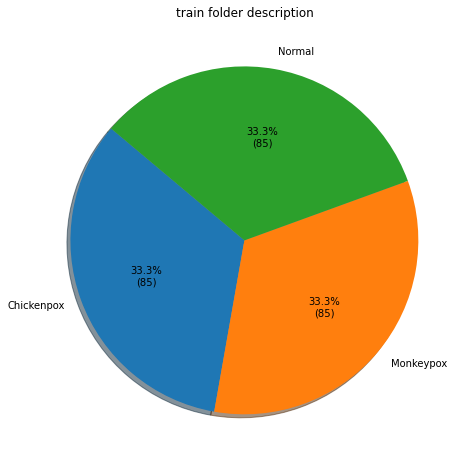

In [6]:
plot_dataset_description(os.path.join(base_dataset_folder, train_data), "train folder description")

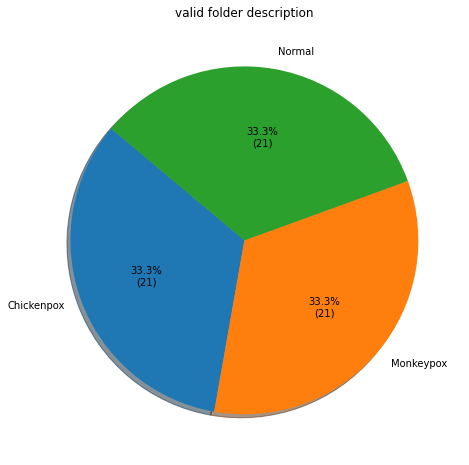

In [7]:
plot_dataset_description(os.path.join(base_dataset_folder, valid_data), "valid folder description")

## Capture training data and labels into respective lists

In [8]:
#Capture training data and labels into respective lists
train_images = []
train_labels = [] 

for directory_path in glob.glob("C:/Dataset/splitted_images2/train/*"):
    label = directory_path.split("\\")[-1]
    print(label)
    for img_path in glob.glob(os.path.join(directory_path, "*.png")):
        print(img_path)
        img = cv.imread(img_path, cv.IMREAD_COLOR)       
        img = cv.resize(img, (SIZE, SIZE))
        img = cv.cvtColor(img, cv.COLOR_RGB2BGR)
        train_images.append(img)
        train_labels.append(label)

Chickenpox
C:/Dataset/splitted_images2/train\Chickenpox\chickenpox1.png
C:/Dataset/splitted_images2/train\Chickenpox\chickenpox10.png
C:/Dataset/splitted_images2/train\Chickenpox\chickenpox100.png
C:/Dataset/splitted_images2/train\Chickenpox\chickenpox101.png
C:/Dataset/splitted_images2/train\Chickenpox\chickenpox102.png
C:/Dataset/splitted_images2/train\Chickenpox\chickenpox103.png
C:/Dataset/splitted_images2/train\Chickenpox\chickenpox104.png
C:/Dataset/splitted_images2/train\Chickenpox\chickenpox105.png
C:/Dataset/splitted_images2/train\Chickenpox\chickenpox106.png
C:/Dataset/splitted_images2/train\Chickenpox\chickenpox107.png
C:/Dataset/splitted_images2/train\Chickenpox\chickenpox11.png
C:/Dataset/splitted_images2/train\Chickenpox\chickenpox12.png
C:/Dataset/splitted_images2/train\Chickenpox\chickenpox13.png
C:/Dataset/splitted_images2/train\Chickenpox\chickenpox15.png
C:/Dataset/splitted_images2/train\Chickenpox\chickenpox16.png
C:/Dataset/splitted_images2/train\Chickenpox\chicken

C:/Dataset/splitted_images2/train\Monkeypox\monkeypox92.png
C:/Dataset/splitted_images2/train\Monkeypox\monkeypox93.png
C:/Dataset/splitted_images2/train\Monkeypox\monkeypox94.png
C:/Dataset/splitted_images2/train\Monkeypox\monkeypox95.png
C:/Dataset/splitted_images2/train\Monkeypox\monkeypox97.png
C:/Dataset/splitted_images2/train\Monkeypox\monkeypox98.png
C:/Dataset/splitted_images2/train\Monkeypox\monkeypox99.png
Normal
C:/Dataset/splitted_images2/train\Normal\normal1.png
C:/Dataset/splitted_images2/train\Normal\normal10.png
C:/Dataset/splitted_images2/train\Normal\normal100.png
C:/Dataset/splitted_images2/train\Normal\normal101.png
C:/Dataset/splitted_images2/train\Normal\normal102.png
C:/Dataset/splitted_images2/train\Normal\normal103.png
C:/Dataset/splitted_images2/train\Normal\normal104.png
C:/Dataset/splitted_images2/train\Normal\normal105.png
C:/Dataset/splitted_images2/train\Normal\normal106.png
C:/Dataset/splitted_images2/train\Normal\normal107.png
C:/Dataset/splitted_images

## Convert lists to arrays 

In [9]:
       
train_images = np.array(train_images)
train_labels = np.array(train_labels)


In [10]:
print(train_images.shape)
print(train_labels.shape)

(255, 224, 224, 3)
(255,)


## Capture test/validation data and labels into respective lists

In [11]:
test_images = []
test_labels = [] 
for directory_path in glob.glob("C:/Dataset/splitted_images2/val/*"):
    label2 = directory_path.split("\\")[-1]
    #print(label2)
    for img_path in glob.glob(os.path.join(directory_path, "*.png")):
        img = cv.imread(img_path, cv.IMREAD_COLOR)
        img = cv.resize(img, (SIZE, SIZE))
        img = cv.cvtColor(img, cv.COLOR_RGB2BGR)
        test_images.append(img)
        test_labels.append(label2)



In [12]:
## Convert lists to arrays                
test_images = np.array(test_images)
test_labels = np.array(test_labels)

In [13]:
print(test_images.shape)
print(test_labels.shape)

(63, 224, 224, 3)
(63,)


## Encode labels from text to integers.Why?
### we need to be 0 or 1 , or 2 instead of train/test_labels[0] = 'Chickenpox'

In [14]:
le = LabelEncoder()
test_labels_encoded= le.fit_transform(test_labels)
train_labels_encoded= le.fit_transform(train_labels)

# data already split but assigning to the meaningful convention would be familiar

In [15]:
X_train , y_train , X_test , y_test = train_images, train_labels_encoded, test_images, test_labels_encoded

## scaling pixel values to between 0 and 1 'manually'

In [16]:
X_train = np.array(X_train)
X_test = np.array(X_test)

In [17]:
X_train , X_test = X_train / 255.0 , X_test / 255.0

In [18]:
# X_train.dtype
# X_test.dtype

## apply one hot encoder to y_train , y_test [class mode: categorical]
### And this because we deal with multicalss classification.

In [19]:
y_train_oneHot_encoder = to_categorical(y_train).astype('float64')
y_test_oneHot_encoder = to_categorical(y_test).astype('float64')

In [20]:
y_train_oneHot_encoder.dtype

dtype('float64')

In [21]:
y_test_oneHot_encoder.dtype

dtype('float64')

# now load the model (VGG16) without fully connected layer / classufier layers / dense layer.

In [22]:
vgg16_model = VGG16(weights='imagenet', include_top=False, input_shape=(SIZE, SIZE, CHANNELS))

## As we work with pre-trained model like vgg16 its important to its parameter un-trainable 

In [23]:
for layer in vgg16_model.layers:
	layer.trainable = False    
vgg16_model.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

# now using training data we extract feature using vgg16 model then using these extracted features for random forest to work as classifier.

In [24]:
extracted_feature_using_train = vgg16_model.predict(X_train)

8/8 [==============================] - 21s 3s/step


In [25]:
extracted_feature_using_train.shape

(255, 7, 7, 512)

In [26]:
features = extracted_feature_using_train.reshape(extracted_feature_using_train.shape[0], -1)

In [27]:
 # to be compatable with random forest model . 
# as we deal with traditional ml ahgorithm thats how the input should be. (row,col)
X_for_RF = features
print(X_for_RF.shape)

(255, 25088)


# random forest instead of fully connected layer as classifier.

In [28]:
RF_model = RandomForestClassifier(n_estimators = 100 , random_state = 42)

## Train the model on training data

In [29]:
y_train

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2], dtype=int64)

In [30]:
RF_model.fit(X_for_RF , y_train)

RandomForestClassifier(random_state=42)

In [31]:
X_test.shape


(63, 224, 224, 3)

## as we do feature ectraction for train data we well do it for test data also , and this because we just using fandom forets as classifier.

In [32]:
extracted_feature_using_test = vgg16_model.predict(X_test)


2/2 [==============================] - 6s 3s/step


In [33]:
extracted_feature_using_test.shape

(63, 7, 7, 512)

In [34]:
X_test_RF = extracted_feature_using_test.reshape(extracted_feature_using_test.shape[0], -1)

In [35]:
RF_predictions =  RF_model.predict(X_test_RF)

In [36]:
X_test_RF.shape

(63, 25088)

In [37]:
RF_predictions

array([0, 2, 0, 0, 2, 0, 0, 1, 1, 0, 2, 0, 0, 0, 0, 1, 0, 2, 1, 0, 2, 1,
       1, 2, 0, 0, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 0, 1, 1, 0, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2],
      dtype=int64)

### now as we see the cell above show , 0`s , 1`s , 2`s
### thus we need to inverse this encoded labeled to the original class name or to the decoded value 

In [38]:
RF_predictions = le.inverse_transform(RF_predictions)

In [39]:
RF_predictions
print(type(RF_predictions))

<class 'numpy.ndarray'>


In [40]:
# test_labels --- > y_true
# RF_predictions ----> y_pred
print("Accuracy =", accuracy_score(test_labels , RF_predictions ))


Accuracy = 0.7301587301587301


In [41]:
conf_ma = confusion_matrix(test_labels ,RF_predictions)

<AxesSubplot:>

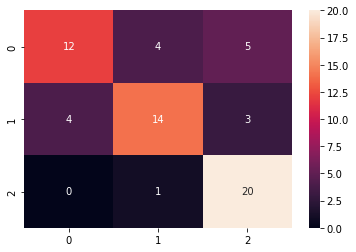

In [42]:
sns.heatmap(conf_ma , annot = True)

1/1 [==============================] - 0s 94ms/step
The prediction for this image is:  ['Monkeypox']
The actual label for this image is:  Monkeypox


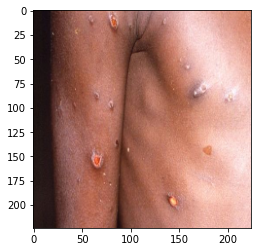

In [43]:
n=np.random.randint(0, X_test.shape[0])
img = X_test[n]
plt.imshow(img)
input_img = np.expand_dims(img, axis=0) #Expand dims so the input is (num images, x, y, c)
input_img_feature=vgg16_model.predict(input_img)
input_img_features=input_img_feature.reshape(input_img_feature.shape[0], -1)
prediction_RF = RF_model.predict(input_img_features)[0] 
prediction_RF = le.inverse_transform([prediction_RF])  #Reverse the label encoder to original name
print("The prediction for this image is: ", prediction_RF)
print("The actual label for this image is: ", test_labels[n])

In [44]:
print(classification_report(test_labels ,RF_predictions))

              precision    recall  f1-score   support

  Chickenpox       0.75      0.57      0.65        21
   Monkeypox       0.74      0.67      0.70        21
      Normal       0.71      0.95      0.82        21

    accuracy                           0.73        63
   macro avg       0.73      0.73      0.72        63
weighted avg       0.73      0.73      0.72        63



In [46]:
print("Recall =", recall_score(test_labels , RF_predictions , average='micro' , labels =['Monkeypox'] ))

Recall = 0.6666666666666666
